In [ ]:
#C21126107
!pip install category_encoders
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
from scipy.stats import zscore
from numpy import percentile
%matplotlib inline
plt.style.use('ggplot')

import category_encoders as ce

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("Coursework_1_data.csv")

Data Description

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#descriptive statistics about data
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
#general inforamtion regarding column names and their types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
#shape of the dataset
data.shape

(12330, 18)

Data Cleaning

In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Explaratory Data Analysis

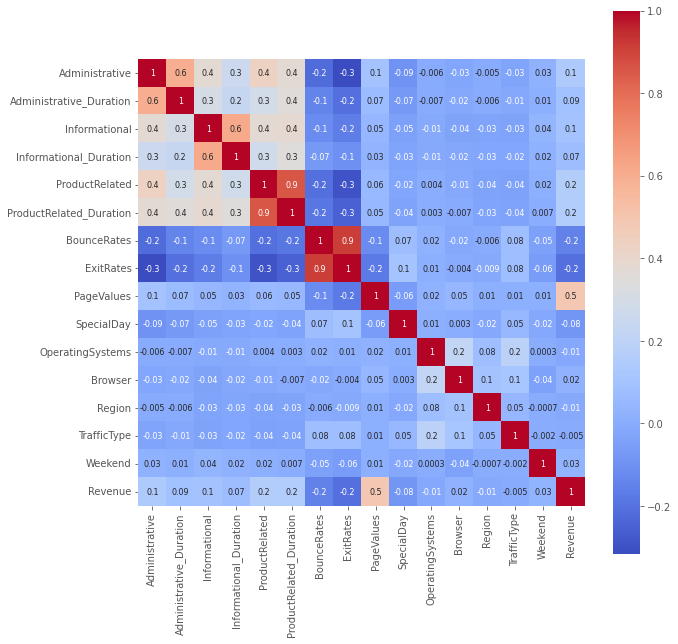

In [ ]:
plt.figure(figsize=(10,10))
matrix = data.corr()
sns.heatmap(data = matrix, cbar = True, square = True, fmt = ".1g", annot = True, annot_kws = {'size':8}, cmap = 'coolwarm')

plt.show() #removal of metadata

Univariate Analysis

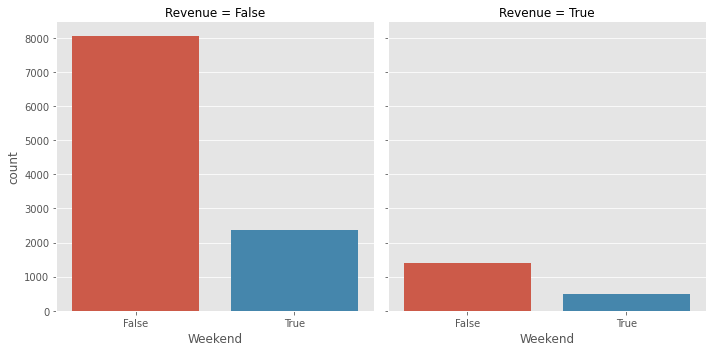

In [ ]:
sns.catplot(x="Weekend", col="Revenue", data=data, kind="count")

plt.show()

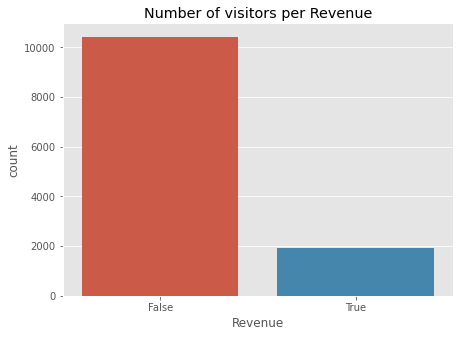

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Revenue")
sns.despine()
plt.title("Number of visitors per Revenue")
plt.show() 

In [ ]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

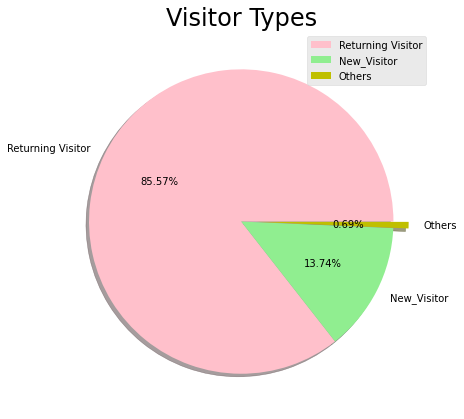

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['pink', 'lightgreen', 'y']
labels = "Returning Visitor", "New_Visitor", "Others"
expl = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors=colors, labels = labels, explode = expl, shadow=True, autopct = '%.2f%%')
plt.title('Visitor Types', fontsize = 24)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [ ]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

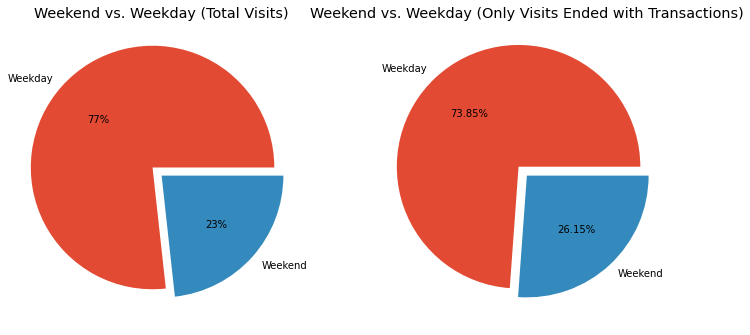

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(data[data['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%.2f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

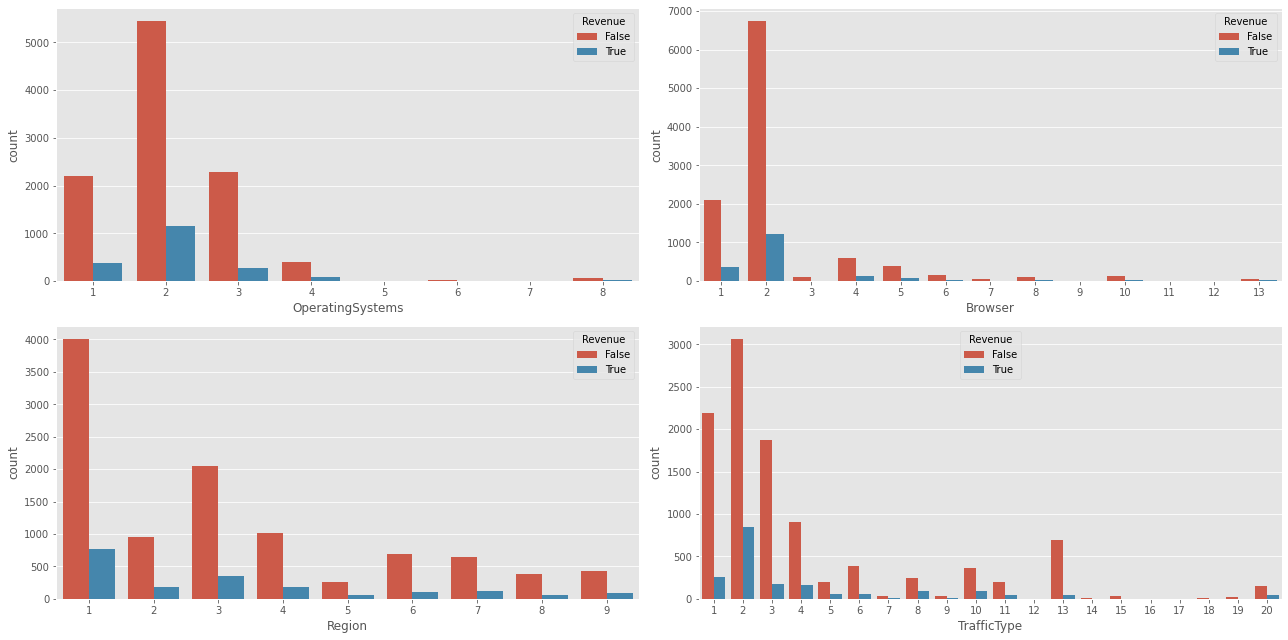

In [ ]:
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=data, x='OperatingSystems', hue="Revenue" ,ax=ax1)
sns.countplot(data=data, x='Browser', hue='Revenue', ax=ax2)
sns.countplot(data=data, x='Region', hue='Revenue', ax=ax3)
sns.countplot(data=data, x='TrafficType', hue='Revenue', ax=ax4)

plt.tight_layout()
plt.show()

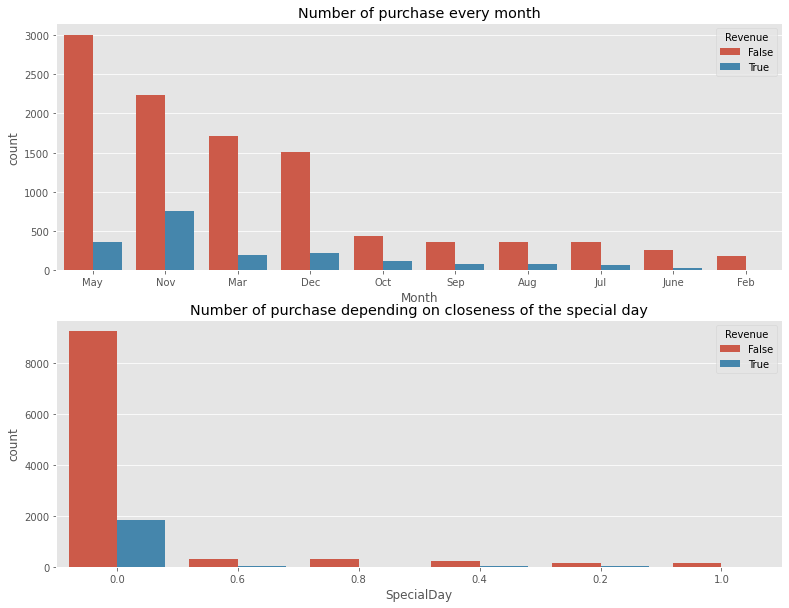

In [ ]:
fig = plt.figure(figsize=(13,10))

axis1 = fig.add_subplot(2,1,1)
axis2 = fig.add_subplot(2,1,2)

sns.countplot(data=data, x='Month', hue='Revenue', order=data['Month'].value_counts().index, ax=axis1)
sns.countplot(data=data,x='SpecialDay', hue='Revenue', order=data['SpecialDay'].value_counts().index, ax=axis2)
axis1.set_title('Number of purchase every month')
axis2.set_title('Number of purchase depending on closeness of the special day')

plt.show()

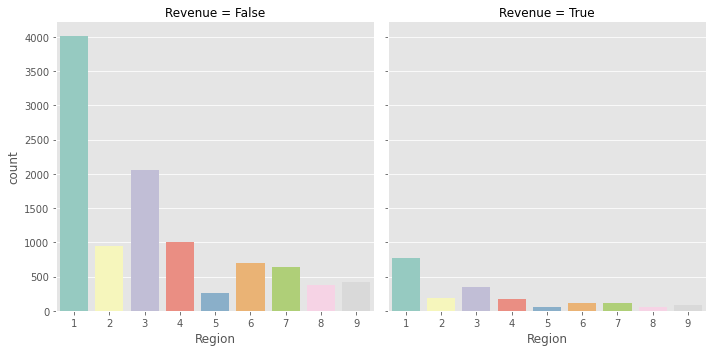

In [ ]:
sns.catplot(x="Region", col="Revenue", data=data, kind="count", palette="Set3")

plt.show()

Bivariate Analysis

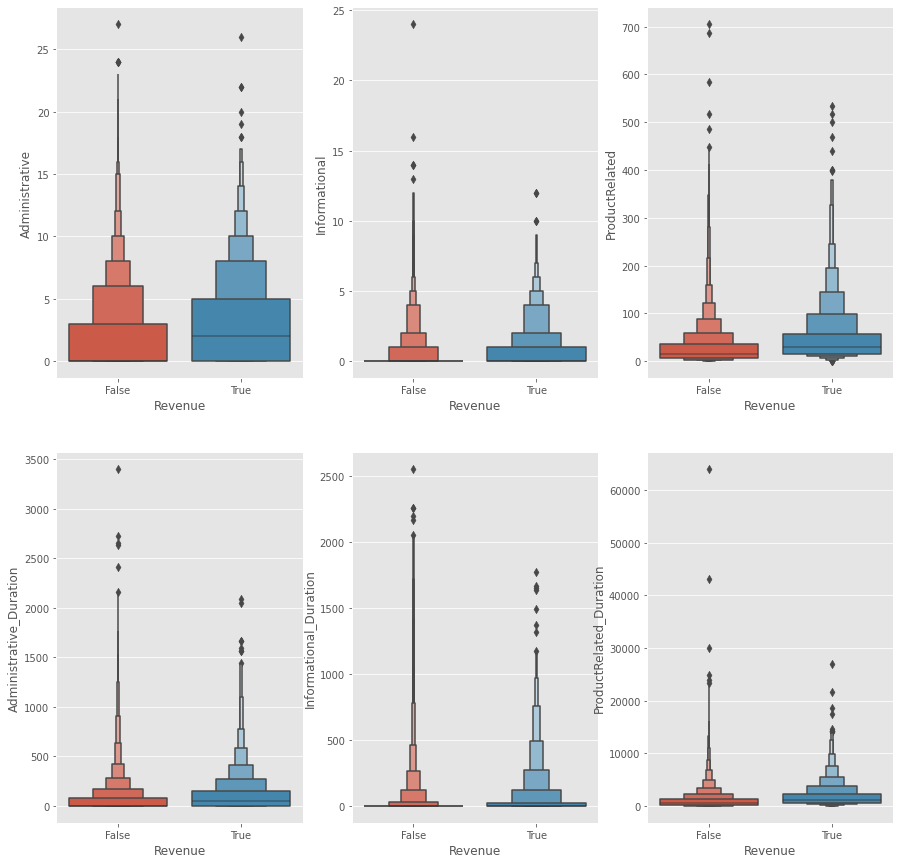

<Figure size 1296x504 with 0 Axes>

In [ ]:
fgr = plt.figure(figsize=(15,15))

#adding axes to boxplots
axis1 = fgr.add_subplot(2,3,1)
axis2 = fgr.add_subplot(2,3,2)
axis3 = fgr.add_subplot(2,3,3)
axis4 = fgr.add_subplot(2,3,4)
axis5 = fgr.add_subplot(2,3,5)
axis6 = fgr.add_subplot(2,3,6)

sns.boxenplot(data=data, x = 'Revenue', y = 'Administrative', ax=axis1)
sns.boxenplot(data=data, x = 'Revenue', y = 'Informational', ax=axis2)
sns.boxenplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=axis3)
sns.boxenplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=axis4)
sns.boxenplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=axis5)
sns.boxenplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=axis6)

plt.show()
plt.tight_layout()

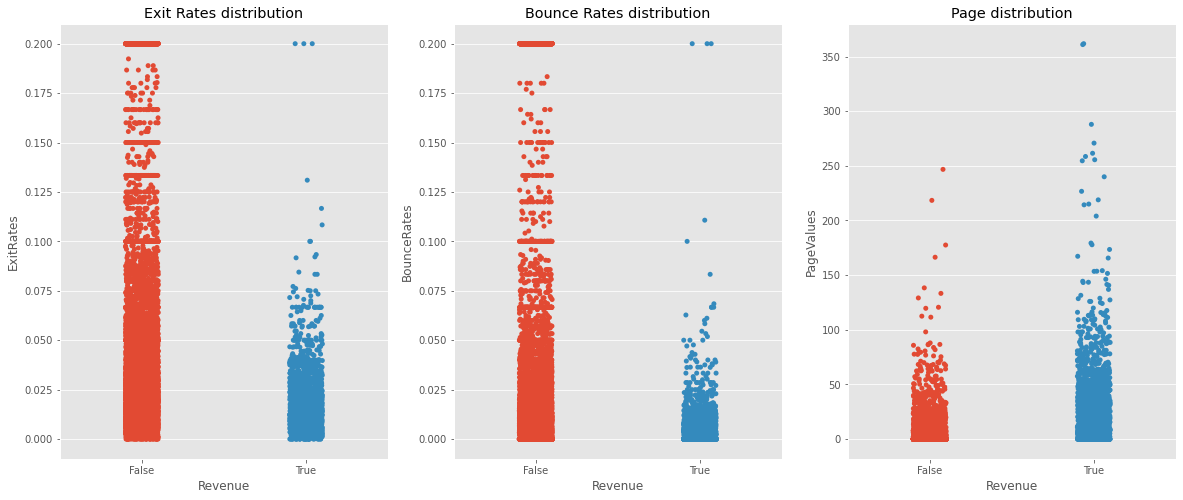

In [ ]:
fgr = plt.figure(figsize=(20,8))

axis1 = fgr.add_subplot(1,3,1)
axis2 = fgr.add_subplot(1,3,2)
axis3 = fgr.add_subplot(1,3,3)

sns.stripplot(data=data, x='Revenue', y='ExitRates', ax=axis1)
axis1.set_title('Exit Rates distribution')

sns.stripplot(data=data, x='Revenue', y='BounceRates', ax=axis2)
axis2.set_title('Bounce Rates distribution')

sns.stripplot(data=data, x='Revenue', y='PageValues', ax=axis3)
axis3.set_title('Page distribution')

plt.show()

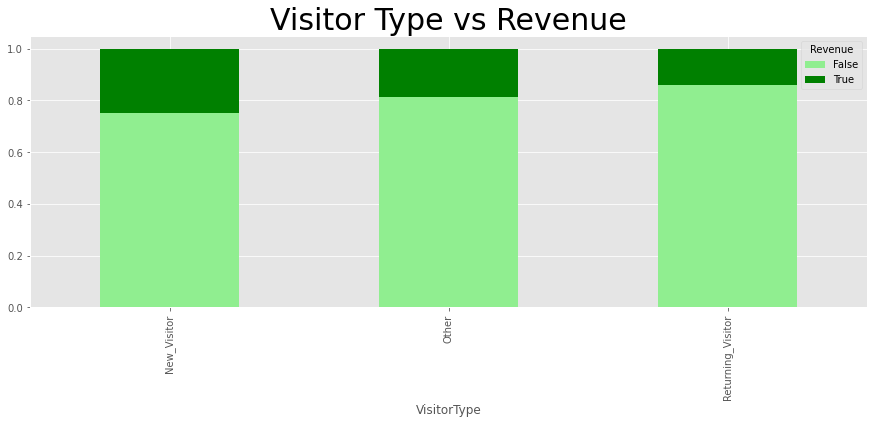

In [ ]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

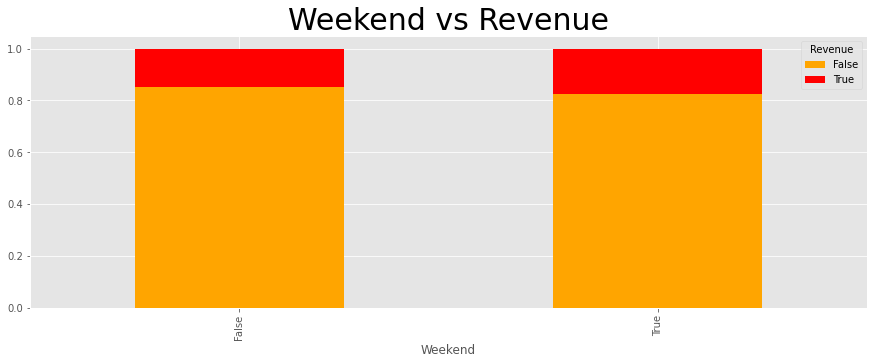

In [ ]:
df2 = pd.crosstab(data['Weekend'], data['Revenue'])
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15,5), color = ['orange', 'red'])
plt.title('Weekend vs Revenue', fontsize=30)
plt.show()

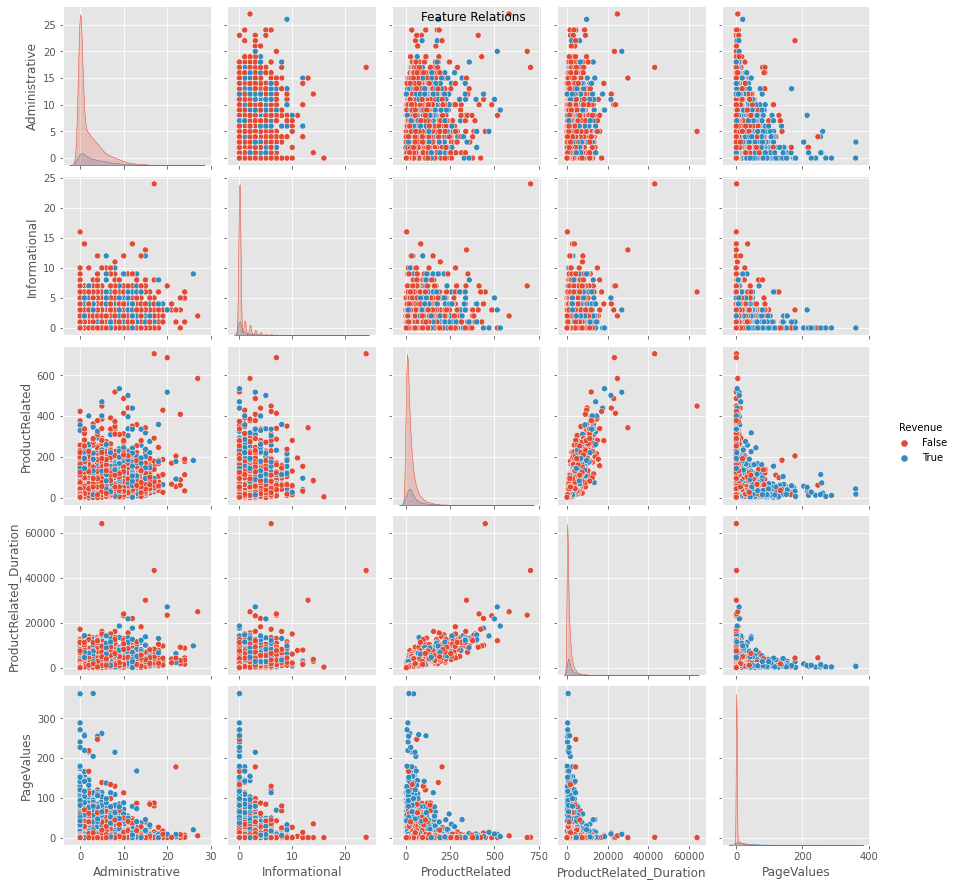

In [ ]:
#I plotted these based on heatmap and strength of relation between variables
comb = sns.pairplot(data[['Administrative', 'Informational', 'ProductRelated','ProductRelated_Duration', 'PageValues', 'Revenue']], hue='Revenue')
comb.fig.suptitle('Feature Relations')
plt.show() 

In [ ]:
column = data.columns

column

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Identifying outliers

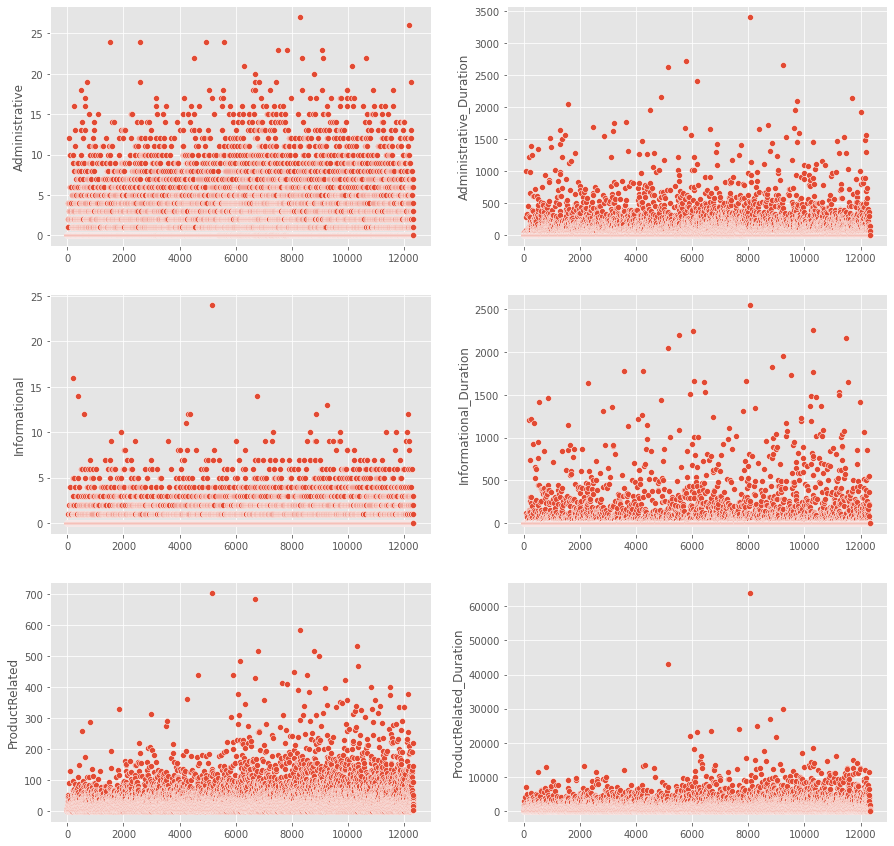

In [ ]:
fgr = plt.figure(figsize=(15,15))

#adding axes to boxplots
axis1 = fgr.add_subplot(3,2,1)
axis2 = fgr.add_subplot(3,2,2)
axis3 = fgr.add_subplot(3,2,3)
axis4 = fgr.add_subplot(3,2,4)
axis5 = fgr.add_subplot(3,2,5)
axis6 = fgr.add_subplot(3,2,6)

sns.scatterplot(data = data['Administrative'], ax=axis1)
sns.scatterplot(data = data['Administrative_Duration'], ax=axis2)
sns.scatterplot(data = data['Informational'], ax=axis3)
sns.scatterplot(data = data['Informational_Duration'], ax=axis4)
sns.scatterplot(data = data['ProductRelated'], ax=axis5)
sns.scatterplot(data = data['ProductRelated_Duration'], ax=axis6)

plt.show()

In [ ]:
data.shape

(12330, 18)

Removal of outliers

In [ ]:
lowerlimit = 0.02
upperlimit = 0.98

Q1 = data.quantile(lowerlimit)
Q3 = data.quantile(upperlimit)
IQR = Q3 - Q1

data_outliers_removed = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
#shape of data after removing outliers
data_outliers_removed.shape #here we have only removed outliers; it is not final data~!!

(12216, 18)

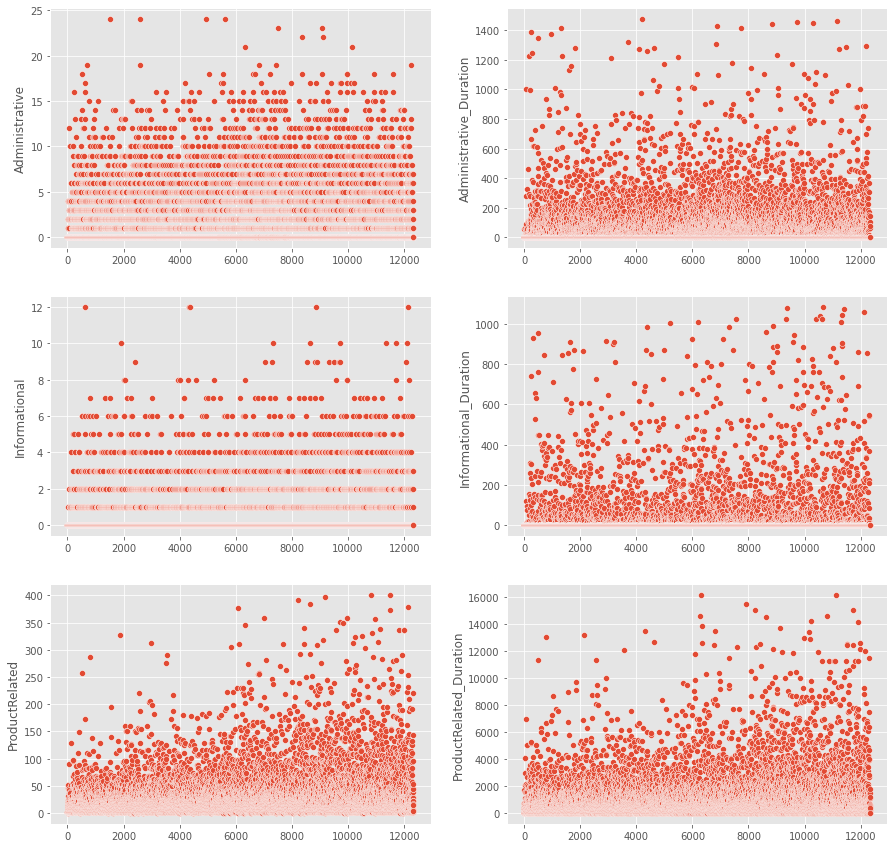

In [ ]:
#look of graphs after removing outliers
fgr = plt.figure(figsize=(15,15))

#adding axes to boxplots
axis1 = fgr.add_subplot(3,2,1)
axis2 = fgr.add_subplot(3,2,2)
axis3 = fgr.add_subplot(3,2,3)
axis4 = fgr.add_subplot(3,2,4)
axis5 = fgr.add_subplot(3,2,5)
axis6 = fgr.add_subplot(3,2,6)

sns.scatterplot(data = data_outliers_removed['Administrative'], ax=axis1)
sns.scatterplot(data = data_outliers_removed['Administrative_Duration'], ax=axis2)
sns.scatterplot(data = data_outliers_removed['Informational'], ax=axis3)
sns.scatterplot(data= data_outliers_removed['Informational_Duration'], ax=axis4)
sns.scatterplot(data = data_outliers_removed['ProductRelated'], ax=axis5)
sns.scatterplot(data = data_outliers_removed['ProductRelated_Duration'], ax=axis6)

plt.show()

#maybe don't remove outliers from informational and infoduration? Graphs look very bad

Data preprocessing

In [ ]:
data.Revenue = data.Revenue.astype('int')
data.Weekend = data.Weekend.astype('int')

One Hot Encoding

In [ ]:
X = data
a = data.drop('VisitorType', axis=1)
b = data.drop('Month', axis=1)
c = data.drop('OperatingSystems', axis=1)
d = data.drop('Browser', axis=1)
e = data.drop('Region', axis=1)

enc = ce.OneHotEncoder(cols = ['VisitorType'])
X = enc.fit_transform(X, a)
enc = ce.OneHotEncoder(cols = ['Month'])
X = enc.fit_transform(X, b)
enc = ce.OneHotEncoder(cols = ['OperatingSystems'])
X = enc.fit_transform(X, c)
enc = ce.OneHotEncoder(cols = ['Browser'])
X = enc.fit_transform(X, d)
enc = ce.OneHotEncoder(cols = ['Region'])
X = enc.fit_transform(X, e)

EncodedData = pd.DataFrame(X)

In [ ]:
print(len(EncodedData.columns))

56


Feature Scalling

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(EncodedData)
fSData = pd.DataFrame(X_train_min_max)

print(fSData.head())

    0    1    2    3         4         5   ...        50   51   52   53   54   55
0  0.0  0.0  0.0  0.0  0.001418  0.000000  ...  0.000000  1.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.002837  0.001000  ...  0.052632  1.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.001418  0.000000  ...  0.105263  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.002837  0.000042  ...  0.157895  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.014184  0.009809  ...  0.157895  1.0  0.0  0.0  1.0  0.0

[5 rows x 56 columns]


Data Split

In [ ]:
#getting dependent and independent varaibles
x = EncodedData
x = x.drop(['Revenue'], axis = 1)

y = EncodedData['Revenue']

print('Shape of x: ', x.shape)
print('Shape of y: ', y.shape)

Shape of x:  (12330, 55)
Shape of y:  (12330,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 45)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

In [ ]:
#checking the shapes
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_train: ', y_test.shape)

Shape of x_train:  (16670, 55)
Shape of x_test:  (2466, 55)
Shape of y_train:  (16670,)
Shape of y_train:  (2466,)


Model Implementation

First Algorithm: Random Forest Classifier

Training Accuracy:  1.0
Testing Accuracy 0.897404703974047
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2087
           1       0.67      0.66      0.66       379

    accuracy                           0.90      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg       0.90      0.90      0.90      2466



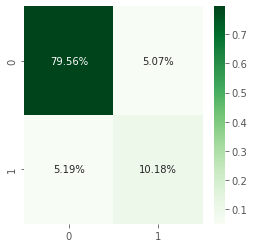

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#cross validation
cv = RepeatedKFold(n_splits = 10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

#evaluating model
print('Training Accuracy: ', model.score(x_train, y_train))
print('Testing Accuracy', model.score(x_test, y_test))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (4,4)
sns.heatmap(cm/np.sum(cm), annot = True, cmap='Greens', fmt='.2%')

#classification report
cr = classification_report(y_test, y_pred)
print(cr)

plt.show()

Second Algorithm: KNN Clasifier

Training Accuracy - KNN Classifier:  0.9094781043791241
Testing Accuracy - KNN Classifier 0.783860502838605


              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2087
           1       0.38      0.64      0.48       379

    accuracy                           0.78      2466
   macro avg       0.65      0.73      0.67      2466
weighted avg       0.84      0.78      0.80      2466
 





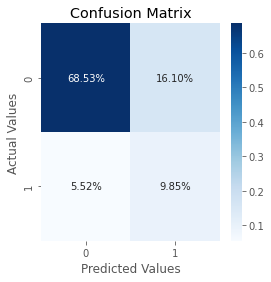

In [ ]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

#evaluating model
cv = RepeatedKFold(n_splits = 10, n_repeats=3, random_state=1)
scores = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Training Accuracy - KNN Classifier: ', knn.score(x_train, y_train))
print('Testing Accuracy - KNN Classifier', knn.score(x_test, y_test))

print("\n")

#classification report
cr = classification_report(y_test, y_pred_knn)
print(cr, "\n")

print("\n")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (4,4)
xticklabels='True Values'
yticklabels='Predicted Values'
s = sns.heatmap(cm/np.sum(cm), annot = True, cmap='Blues', fmt='.2%', xticklabels=True, yticklabels=True)
s.set(xlabel='Predicted Values', ylabel='Actual Values', title='Confusion Matrix')

plt.show()

Third algorithm: Logistic Regression

Training Accuracy - Logisitc Regression:  0.8493101379724055
Testing Accuracy - Logistic Regression 0.8763179237631792


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2087
           1       0.59      0.66      0.62       379

    accuracy                           0.88      2466
   macro avg       0.76      0.79      0.77      2466
weighted avg       0.88      0.88      0.88      2466





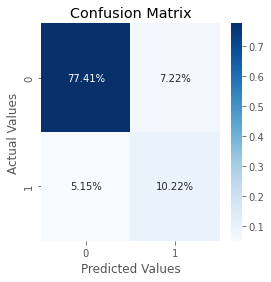

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

#evaluating model
scores = cross_val_score(lr, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Training Accuracy - Logisitc Regression: ', lr.score(x_train, y_train))
print('Testing Accuracy - Logistic Regression', lr.score(x_test, y_test))

print("\n")
#classification report
cr = classification_report(y_test, y_pred)
print(cr)

print("\n")
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (4,4)
xticklabels='True Values'
yticklabels='Predicted Values'
s = sns.heatmap(cm/np.sum(cm), annot = True, cmap='Blues', fmt='.2%', xticklabels=True, yticklabels=True)
s.set(xlabel='Predicted Values', ylabel='Actual Values', title='Confusion Matrix')

plt.show()

Model Evaluation

Random Forest Optimised

In [ ]:
#grid for optimised random forest
random_grid_set_up = {'n_estimators': [200, 400, 600],
               'max_features': ['sqrt', 'log2'],
               'max_depth': [5, 50, 100],
               'min_samples_split': [5, 10, 15],
               'min_samples_leaf': [1, 5, 10], 
               'criterion':['gini']
              }

rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid_set_up,n_iter=100,n_jobs=-1, scoring='accuracy')

In [ ]:
rf_grid.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [5, 50, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [200, 400, 600]},
                   scoring='accuracy')

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=15, n_estimators=400)

In [ ]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 400}

In [ ]:
rf_grid = RandomForestClassifier(criterion='gini', 
                                 max_depth=100, 
                                 max_features='sqrt', 
                                 min_samples_leaf=5, 
                                 min_samples_split=15, n_estimators=400)
rf_grid.fit(x_train, y_train)

rf_gridPred = rf_grid.predict(x_test)

#performance
print("Testing Accuracy :", rf_grid.score(x_test, y_test))

cr23 = classification_report(y_test, rf_gridPred)
print(cr23)

Testing Accuracy : 0.9018653690186537
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2087
           1       0.67      0.73      0.69       379

    accuracy                           0.90      2466
   macro avg       0.81      0.83      0.82      2466
weighted avg       0.91      0.90      0.90      2466



KNN Optimised

In [ ]:
knn_param_grid = {'n_neighbors': list(range(1,30)), 
                  'leaf_size': [1,10,20], 
                  'p': [1,2],
                  'weights': ['uniform','distance']}
knn_grid = RandomizedSearchCV(KNeighborsClassifier(),
                        knn_param_grid,
                        verbose=3)

In [ ]:
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=1, n_neighbors=8, p=1, weights=distance;, score=0.879 total time=   3.1s
[CV 2/5] END leaf_size=1, n_neighbors=8, p=1, weights=distance;, score=0.886 total time=   2.4s
[CV 3/5] END leaf_size=1, n_neighbors=8, p=1, weights=distance;, score=0.885 total time=   2.4s
[CV 4/5] END leaf_size=1, n_neighbors=8, p=1, weights=distance;, score=0.895 total time=   2.4s
[CV 5/5] END leaf_size=1, n_neighbors=8, p=1, weights=distance;, score=0.882 total time=   2.3s
[CV 1/5] END leaf_size=1, n_neighbors=15, p=1, weights=uniform;, score=0.824 total time=   2.3s
[CV 2/5] END leaf_size=1, n_neighbors=15, p=1, weights=uniform;, score=0.850 total time=   2.5s
[CV 3/5] END leaf_size=1, n_neighbors=15, p=1, weights=uniform;, score=0.852 total time=   2.5s
[CV 4/5] END leaf_size=1, n_neighbors=15, p=1, weights=uniform;, score=0.856 total time=   2.5s
[CV 5/5] END leaf_size=1, n_neighbors=15, p=1, weights=uniform;, score=0.84

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [1, 10, 20],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [ ]:
knn_grid.best_params_

{'leaf_size': 10, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=2, p=1, weights='distance')

In [ ]:
knn_grid = KNeighborsClassifier(n_neighbors=2, weights='distance', leaf_size=20, p=2)
knn_grid.fit(x_train, y_train)
knn_grid_pred = knn_grid.predict(x_test)

#performance
print("Testing Accuracy :", knn_grid.score(x_test, y_test))

cr32 = classification_report(y_test, knn_grid_pred)
print(cr32)

Testing Accuracy : 0.8061638280616383
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2087
           1       0.40      0.53      0.45       379

    accuracy                           0.81      2466
   macro avg       0.65      0.69      0.67      2466
weighted avg       0.83      0.81      0.82      2466



Logistic Regression Optimised

In [ ]:
from scipy.stats import loguniform
lr_param_grid = {'C': [loguniform(1e-5, 1e0, 100)],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 
              'penalty': ['none', 'l1', 'l2', 'elasticnet']
              } 

lr_grid = RandomizedSearchCV(LogisticRegression(),
                        lr_param_grid,
                        refit=True,
                        verbose=3, scoring='accuracy', n_iter=500)

In [ ]:
space = dict()
space['C'] = loguniform(1e-5, 100)
space['solver'] = ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']                

lr_grid = RandomizedSearchCV(LogisticRegression(),
                        space,
                        refit=True,
                        verbose=3, scoring='accuracy', n_iter=500)

In [ ]:
lr_grid.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5] END C=0.13430275345611273, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.13430275345611273, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.13430275345611273, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.13430275345611273, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.13430275345611273, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=2.2456095785667296, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=2.2456095785667296, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=2.2456095785667296, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.2456095785667296, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.2456095785667296, penalty=l1, solver=ne

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=500,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7bf00a3410>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga', 'liblinear']},
                   scoring='accuracy', verbose=3)

In [ ]:
lr_grid.best_params_

{'C': 0.07837439644529834, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
lr_grid.best_estimator_

LogisticRegression(C=0.07837439644529834, solver='liblinear')

In [ ]:
lr_grid = LogisticRegression(C = 4.974966130935204, penalty = 'l2', solver = 'liblinear')

lr_grid.fit(x_train, y_train)

lr_gridPred = lr_grid.predict(x_test)

#performance
print("Testing Accuracy :", lr_grid.score(x_test, y_test))
cr54 = classification_report(y_test, lr_gridPred)
print(cr54)

Testing Accuracy : 0.8803730738037308
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2087
           1       0.67      0.44      0.53       379

    accuracy                           0.88      2466
   macro avg       0.79      0.70      0.73      2466
weighted avg       0.87      0.88      0.87      2466

